In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data=pd.read_csv("Dataset11-Weather-Data.csv")
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:
data.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [4]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [6]:
x='Thunderstorms,Moderate Rain Showers,Fog'

In [7]:
lol=[w.split() for w in x.split(',')]
lol

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [8]:
from itertools import chain
flat_l=list(chain(*lol))
flat_l

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [10]:
def create_l(x):
    lol=[w.split() for w in x.split(',')]
    fl=list(chain(*lol))
    return fl
def get_weather(l1):
    if 'Fog' in l1 and 'Rain' in l1:
        return 'RAIN+FOG'
    elif 'Snow' in l1 and 'Rain' in l1:
        return 'SNOW+RAIN'
    elif 'Snow' in l1:
        return 'Snow'
    elif 'Rain' in l1:
        return 'Rain'
    elif 'Fog' in l1:
        return 'Fog'
    elif 'Clear' in l1:
        return 'Clear'
    elif 'Cloudy' in l1:
        return 'Cloudy'
    else:
        return 'Rain'

In [11]:
create_l(x)


['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [12]:
get_weather(x)

'RAIN+FOG'

In [16]:
data['Std_Weather']=data['Weather'].apply(lambda x : get_weather(create_l(x)) )

In [17]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",Fog
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",Fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,Fog


In [18]:
data.Std_Weather.value_counts()

Cloudy       3797
Clear        3432
Rain          603
Snow          556
Fog           241
RAIN+FOG      129
SNOW+RAIN      26
Name: Std_Weather, dtype: int64

In [23]:
cdf=data[data['Std_Weather']=='Cloudy']
cdf_s=cdf.sample(600)
cdf_s.shape

(600, 9)

In [22]:
cldf=data[data['Std_Weather']=='Clear']
cldf_s=cdf.sample(600)
cdf_s.shape

(600, 9)

In [21]:
rdf=data[data['Std_Weather']=='RAIN']
sdf=data[data['Std_Weather']=='SNOW']

In [24]:
wdf=pd.concat([cdf_s,cldf,rdf,sdf],axis=0)
wdf.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
482,1/21/2012 2:00,-15.3,-22.8,53,0,25.0,102.27,Cloudy,Cloudy
5666,8/24/2012 2:00,20.4,12.4,60,9,25.0,101.63,Mostly Cloudy,Cloudy
5295,8/8/2012 15:00,28.3,14.7,43,7,24.1,100.94,Mostly Cloudy,Cloudy
875,2/6/2012 11:00,1.9,-2.8,71,35,24.1,100.57,Cloudy,Cloudy
4872,7/22/2012 0:00,22.7,14.9,61,11,25.0,101.19,Cloudy,Cloudy


In [25]:
wdf.drop(columns=['Date/Time','Weather'],axis=1,inplace=True)

In [27]:
wdf[wdf.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [29]:
cols=['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa','Std_Weather']
cor_mat=wdf[cols].corr()
cor_mat

C:\Users\V.V.MANOJ\AppData\Local\Temp\ipykernel_5100\566260354.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=wdf[cols].corr()


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.938913,-0.217959,0.013284,0.200014,-0.416941
Dew Point Temp_C,0.938913,1.000000,0.124729,-0.082192,0.021276,-0.439514
Rel Hum_%,-0.217959,0.124729,1.000000,-0.287501,-0.507322,-0.040598
Wind Speed_km/h,0.013284,-0.082192,-0.287501,1.000000,0.191077,-0.308976
Visibility_km,0.200014,0.021276,-0.507322,0.191077,1.000000,0.052344
Press_kPa,-0.416941,-0.439514,-0.040598,-0.308976,0.052344,1.000000


<Axes: >

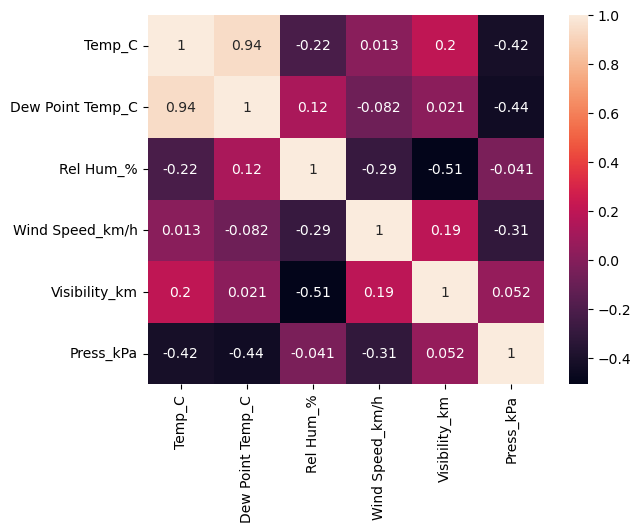

In [30]:
sns.heatmap(cor_mat,annot=True)

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
wdf['Std_Weather']=le.fit_transform(wdf['Std_Weather'])


In [48]:
X=wdf.drop(['Std_Weather'],axis=1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
482,-15.3,-22.8,53,0,25.0,102.27
5666,20.4,12.4,60,9,25.0,101.63
5295,28.3,14.7,43,7,24.1,100.94
875,1.9,-2.8,71,35,24.1,100.57
4872,22.7,14.9,61,11,25.0,101.19
...,...,...,...,...,...,...
8754,-12.6,-16.0,76,24,25.0,101.36
8755,-13.4,-16.5,77,26,25.0,101.47
8756,-13.8,-16.5,80,24,25.0,101.52
8757,-13.8,-16.5,80,20,25.0,101.50


In [49]:
from sklearn.preprocessing import StandardScaler
std_s=StandardScaler()
x_std=std_s.fit_transform(X)
x_std

array([[-2.05074304, -2.2270694 , -0.60346381, -1.62613601, -0.63217755,
         1.28630451],
       [ 0.83198053,  0.84212382, -0.16715563, -0.52247911, -0.63217755,
         0.41625026],
       [ 1.46989414,  1.04266769, -1.22676122, -0.7677362 , -0.71150552,
        -0.52177698],
       ...,
       [-1.92962021, -1.67775357,  1.07943919,  1.31694906, -0.63217755,
         0.26670969],
       [-1.92962021, -1.67775357,  1.07943919,  0.82643488, -0.63217755,
         0.23952049],
       [-1.92154535, -1.66031497,  1.14176893,  0.70380634, -0.63217755,
         0.29389888]])

In [50]:
y=wdf['Std_Weather']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.2,random_state=42)
  

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()


In [52]:
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)


In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [54]:
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       665
           1       0.37      0.33      0.35       142

    accuracy                           0.78       807
   macro avg       0.62      0.61      0.61       807
weighted avg       0.77      0.78      0.78       807



<Axes: >

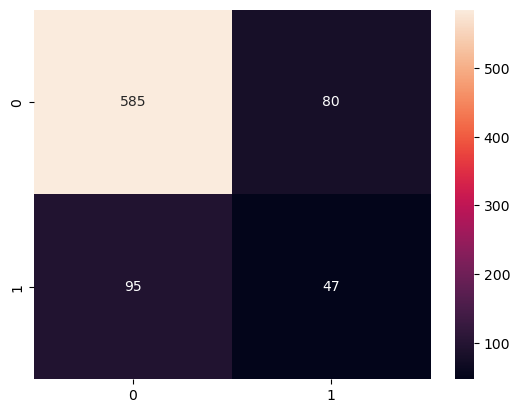

In [42]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier()
rfm.fit(x_train,y_train)
y_predrfm=rfm.predict(x_test)
accuracy_score(y_test,y_predrfm)

0.8351920693928129